In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing nltk libraries 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string 
import re

In [3]:
#reading the reviews.csv file
data=pd.read_csv("rating_prediction.csv")
data

Reviews  Ratings
0      I didn't like this because this phone lags whe...      1.0
1      one advantage is weightless,easy messaging. bu...      1.0
2      Wonderful Features phone. Perfect for secondar...      1.0
3      Wonderful Features phone. Perfect for secondar...      1.0
4      Not a value for money. Please don't purchase t...      1.0
...                                                  ...      ...
20501  Lets just say, every good review mentioned her...      4.0
20502  Very good product,but only one problem,the pow...      4.0
20503  I received a damaged product, it also appears ...      1.0
20504  Its just a duplicate product. I charged My 300...      1.0
20505  The power bank arrived 2 days before the expec...      4.0

[20506 rows x 2 columns]

1. This is the file with reviews and ratings records which we have scraped from e-commerce websites- Amazon and Flipkart.
2. We have already balanced the dataset and dropped the null values. So we have a clean dataset with us.
3. We have almost 2000 each reviews for each rating.


In [4]:
#randomly shuffling the data to have shuffled ratings
data=data.sample(frac=1).reset_index(drop=True)
data

Reviews  Ratings
0      On opening the Amazon platic bag I found the c...      1.0
1      I bought the phone after getting attracted to ...      3.0
2      Could not synchronise phone contact and only h...      3.0
3      The tablet is pretty heavy compared to other t...      4.0
4      How to use plz send a person from whirlpool\nR...      1.0
...                                                  ...      ...
20501                          Decent according to price      4.0
20502  Very very energy efficient. Installation was d...      5.0
20503  Moniter okay but delivery partner very worst.,...      4.0
20504  Good finish and charging good . 2 day delivery...      5.0
20505                                 1 hour full charge      1.0

[20506 rows x 2 columns]

In [5]:
#getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20506 entries, 0 to 20505
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  20506 non-null  object 
 1   Ratings  20506 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.5+ KB


> Observation:
    >> We have thwo columns in our dataset. Reviews in which we have reviews of different products and ratings a float type which has 1, 2, 3, 4 or 5 as observation. 

null values
Reviews            0
Ratings            0

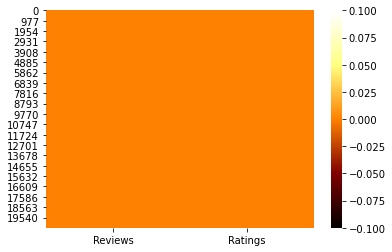

In [6]:
#checking for null values in the dataset with heatmap
sns.heatmap(data.isnull(),cmap='afmhot')
data.isnull().sum().to_frame().rename(columns={0:'null values'})

Observation: As we have already removed null values. We have a clean dataset.

In [7]:
#getting some insights about the reviews using describe function
data.groupby('Ratings')['Reviews'].describe().T

Ratings       1.0                   2.0   3.0   4.0   5.0
count        4648                  1846  3203  5211  5598
unique       3416                  1424  2116  3377  3930
top      Very bad  COLOR IS NOT CORRECT  Good  Good  Good
freq           42                    20    87   160    69

> Observation:

In the Dataset

   >> We have reviews for all the ratings.
    >>>Rating 5- 5598
    >>>Rating 4- 5211
    >>>Rating 3- 3203
    >>>Rating 2- 1846
    >>>Rating 1- 4648 
    
   >> Top Occuring reviews for 2 and 1 rating  we see negative comments which shows the product is really not meet to customer satisfaction.
   
   >> For ratings 3, 4 and 5 we see word 'good' appearing most number of times.


# Data Visualization

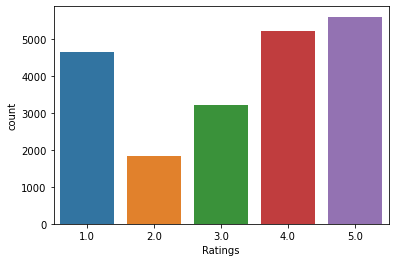

Ratings
5.0     5598
4.0     5211
1.0     4648
3.0     3203
2.0     1846

In [8]:
sns.countplot(data['Ratings'])
plt.show()
data['Ratings'].value_counts().to_frame().rename(columns={0:'value counts'})

In [9]:
#checking the length of reviews
data['Length']=data['Reviews'].apply(len)

In [10]:
data

Reviews  Ratings  Length
0      On opening the Amazon platic bag I found the c...      1.0     549
1      I bought the phone after getting attracted to ...      3.0     722
2      Could not synchronise phone contact and only h...      3.0      66
3      The tablet is pretty heavy compared to other t...      4.0     222
4      How to use plz send a person from whirlpool\nR...      1.0      53
...                                                  ...      ...     ...
20501                          Decent according to price      4.0      25
20502  Very very energy efficient. Installation was d...      5.0     871
20503  Moniter okay but delivery partner very worst.,...      4.0     102
20504  Good finish and charging good . 2 day delivery...      5.0      63
20505                                 1 hour full charge      1.0      18

[20506 rows x 3 columns]

The review with maximum words have 19948 words
The review with minimum words have 1 words


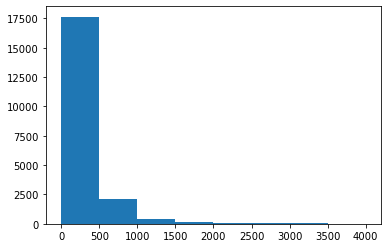

In [11]:
import matplotlib.pyplot as plt
bins=[0,500,1000,1500,2000,2500,3000,3500,4000]
plt.hist(data['Length'],bins=bins)
print('The review with maximum words have {} words'.format(data['Length'].max()))
print('The review with minimum words have {} words'.format(data['Length'].min()))
plt.show()

# > Observation:
    >> We can see around 17500 reviews have length upto 500.
    >> Longest review has 19948 words and shortest has only one word.

In [12]:
#Dropping reviews with more than 1000 words as extra words might delay our model and would also reduce the accuracy of the model
data_new=data[data['Length']<=1000]
print("Number of records before were: {}  and after dropping the records with reviews having more than 1000 words we have {} records left.".format(len(data),len(data_new)))

Number of records before were: 20506  and after dropping the records with reviews having more than 1000 words we have 19746 records left.


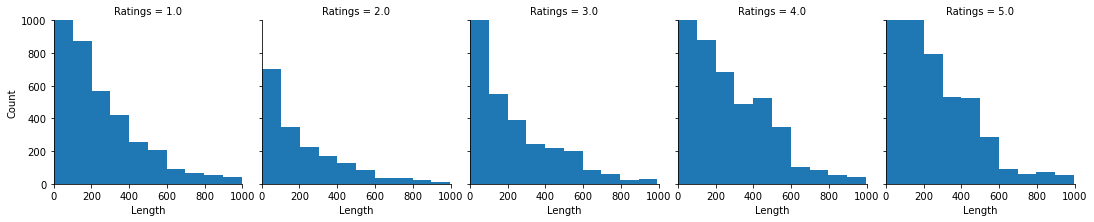

In [13]:
#plotting the length of reviews for different ratings
import matplotlib.pyplot as plt
g=sns.FacetGrid(data_new,col='Ratings')
g.map_dataframe(plt.hist,x='Length')
plt.axis([0,1000,0,1000])
g.set_axis_labels('Length','Count')
plt.show()

> Observation:
    >> We can observe from the plot that for rating 1,3,4 and 5 we have 1000 reviews moslty having words upto 50.
    >> For rating 2 we see upto 600 reviews have 50 words.

# Word Cloud

In [14]:
#importing wordcloud
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

In [15]:
def cloud_generator(i):
    df=data_new[data_new['Ratings']==i]
    words=df.Reviews.values
    rating_cloud = WordCloud(max_font_size=160, background_color ="white").generate(" ".join(words))
    plt.figure(figsize=(16,10))
    plt.subplot(211)
    plt.title("Frequent words in {} star rating".format(i),fontsize=20)
    plt.tight_layout(pad = 0)
    plt.imshow(rating_cloud, interpolation='bilinear')
    plt.axis('off') # turn off axis
    plt.show()

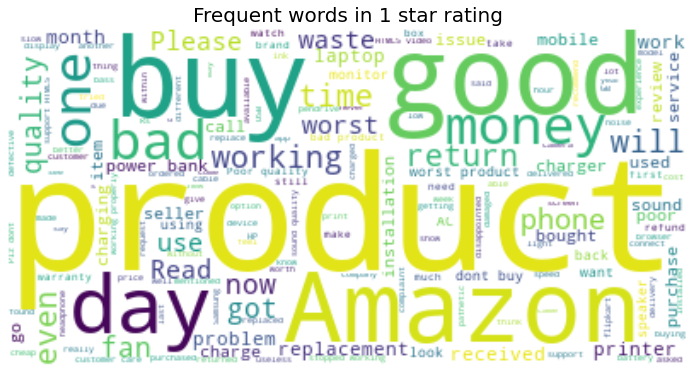

In [16]:
cloud_generator(1)

> Observation:
    >> Negative words that can be seen in 1 star rating are 'return', 'waste', 'bad', 'return', 'problem',.
    
   >> Frequently occuring words are 'Amazon' 'buy', 'product', 'one'. Here 'one' might be occuring frequently because of 1 star rating.

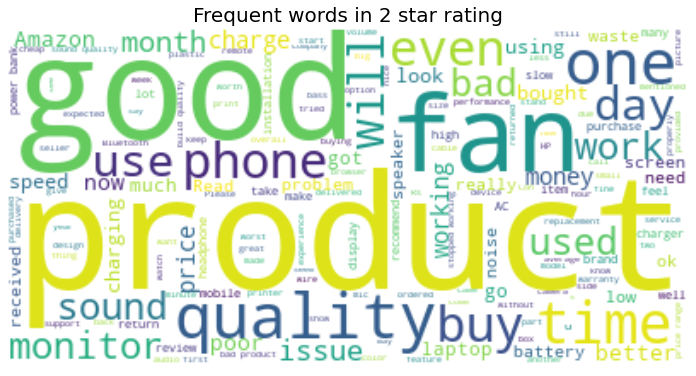

In [17]:
cloud_generator(2)

> Observation:
    >> We can see negative words like 'bad','low','slow'.
    
>> Frequently occuring words are 'product', 'monitor','fan'.

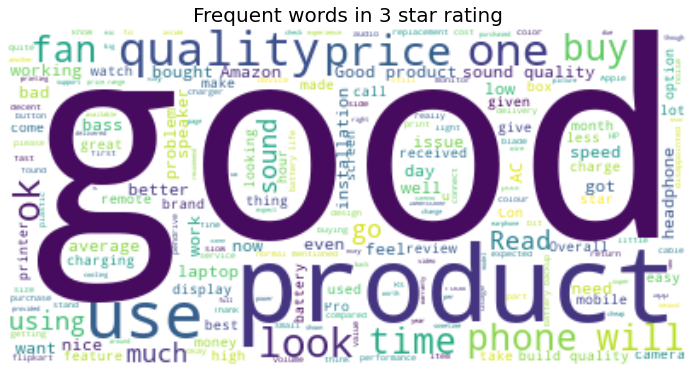

In [18]:
cloud_generator(3)

> Observation:
    >> Negative words that can be seen in reviews with 3 star rating are 'problem', 'issue', also we can see positive words like 'good' and neutral words like 'average'.

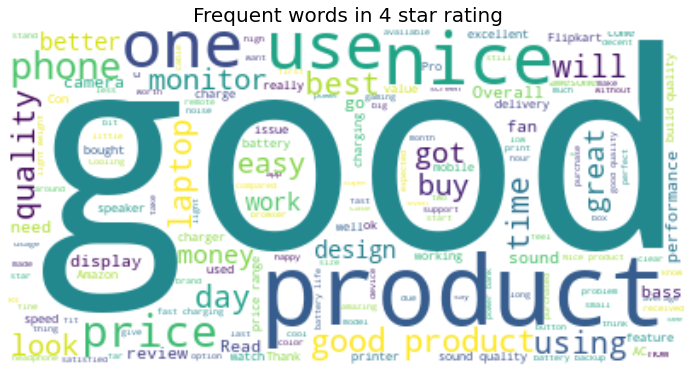

In [19]:
cloud_generator(4)

> Observation:
    >> Frequently occuring words for reviews with rating 4 are 'good','good product', 'nice','use one' 'great', 'quality'.

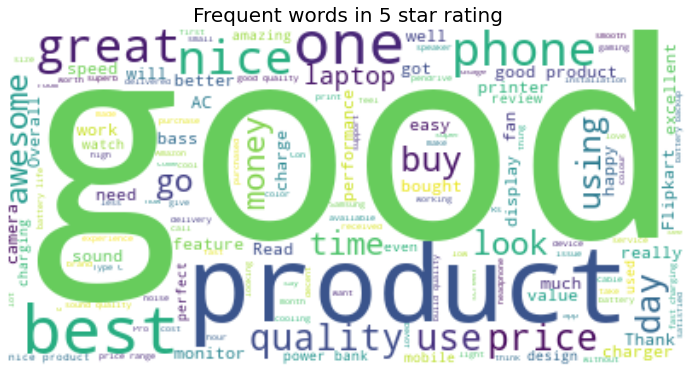

In [20]:
cloud_generator(5)

> Observation:
    >> Frequently positive occuring words for reviews with rating 5 are 'good', 'great', 'best', 'awesome'.

# Data Pre-processing

In data-preprocessing we will clean the text in following manner:

1. Converting all the words to lowercase so their is no difference between words like'New' and 'new'.
2. Removing everything from the text except words as punctuations, special characters cannot be used to identify ratings.
3. Splitting the text into single words using tokenization.
4. Removing Stop words- stopwords are the words which doesnot hold much importance and additionally add no meaning to the text.
5. Applying WordNetLemmatizer to convert the inflected words to a meaningful base word.

In [21]:
#looking at the reviews before cleaning
print(data_new['Reviews'][1])

I bought the phone after getting attracted to the banners only and here's what i found out after that:
Pros - 5,000 mah Battery is Very good can go upto 2 days without charge, true 48 mp quad camera is upto the mark as expected from samsung, 750 g processor is excellent, 5G bands are supportive with more frequencies and lastly, Knox security plays a big role in making it better.
Cons - Display is really bad only HD+ instead Samsung should have gone with FHD+ with this price and it has only 266 PPI which makes it even worse only thing good in display is that it is Super Amoled, In-box Charger is only 15W which is also dissapointing and aslo there wasn't any soft case inside the box or pre-applied screen protector.


In [22]:
data_new['Reviews'][29]

'Sound is good , these earphone are good except one thing: the earphones are really very heavy and you cannot put it into your ears as it will fall down. That is the main reason that I have to return this product.\n\nNot only me, I have seen my colleagues having the same issues so I would recommend not to buy this\n\nOtherwise sound quality and bass is very good.'

1. We can see \n, emojis and other special characters present in the reviews. We will clean the reviews to reduce the number of words present in the records. Lesser the words better the performance of the model. 

>Now we will pre-process the text and see the changes in the reviews.

In [23]:
#checking the length of stopwords
len(stopwords.words('english'))

179

In [24]:
#removing some of the negative words from the list of stop words which would help us know the ratings better.
list=['no','not',"don't",'never','but']
stop_words=[i for i in stopwords.words('english') if i not in list]
len(stop_words)

175

In [25]:
def process(text):
    #1. converting the text to lowercase
    lower=text.lower()
    #2. removing the punctuation and \n
    clean=re.sub("[^a-z'A-Z']+"," ",lower)
    #3. splitting the sentence into words
    tokens=word_tokenize(clean)
    #4. Removing stop words and lemmatizing the words to base words.
    lemma=WordNetLemmatizer()
    clean_text=[lemma.lemmatize(i) for i in tokens if i not in stop_words]
    #5. joining tokens again into a sentence
    clean_text=' '.join(clean_text)
    #6. returning clean text
    return clean_text

In [26]:
import nltk
data_new['Clean_Reviews']=data_new['Reviews'].apply(process)

In [27]:
data_new

Reviews  Ratings  Length  \
0      On opening the Amazon platic bag I found the c...      1.0     549   
1      I bought the phone after getting attracted to ...      3.0     722   
2      Could not synchronise phone contact and only h...      3.0      66   
3      The tablet is pretty heavy compared to other t...      4.0     222   
4      How to use plz send a person from whirlpool\nR...      1.0      53   
...                                                  ...      ...     ...   
20501                          Decent according to price      4.0      25   
20502  Very very energy efficient. Installation was d...      5.0     871   
20503  Moniter okay but delivery partner very worst.,...      4.0     102   
20504  Good finish and charging good . 2 day delivery...      5.0      63   
20505                                 1 hour full charge      1.0      18   

                                           Clean_Reviews  
0      opening amazon platic bag found cardbox opened...  
1      bought phone getting attracted banner 's found...  
2      could not synchronise phone contact store contact  
3      tablet pretty heavy compared tablet battery ok...  
4                     use plz send person whirlpool read  
...                                                  ...  
20501                             decent according price  
20502  energy efficient installation done bluestar te...  
20503  moniter okay but delivery partner worst colour...  
20504  good finish charging good day delivery thanks ...  
20505                                   hour full charge  

[19746 rows x 4 columns]

In [28]:
#checking the length of reviews after pre processing
data_new['New_Length']=data_new['Clean_Reviews'].apply(len)
data_new

Reviews  Ratings  Length  \
0      On opening the Amazon platic bag I found the c...      1.0     549   
1      I bought the phone after getting attracted to ...      3.0     722   
2      Could not synchronise phone contact and only h...      3.0      66   
3      The tablet is pretty heavy compared to other t...      4.0     222   
4      How to use plz send a person from whirlpool\nR...      1.0      53   
...                                                  ...      ...     ...   
20501                          Decent according to price      4.0      25   
20502  Very very energy efficient. Installation was d...      5.0     871   
20503  Moniter okay but delivery partner very worst.,...      4.0     102   
20504  Good finish and charging good . 2 day delivery...      5.0      63   
20505                                 1 hour full charge      1.0      18   

                                           Clean_Reviews  New_Length  
0      opening amazon platic bag found cardbox opened...         347  
1      bought phone getting attracted banner 's found...         441  
2      could not synchronise phone contact store contact          49  
3      tablet pretty heavy compared tablet battery ok...         142  
4                     use plz send person whirlpool read          34  
...                                                  ...         ...  
20501                             decent according price          22  
20502  energy efficient installation done bluestar te...         551  
20503  moniter okay but delivery partner worst colour...          83  
20504  good finish charging good day delivery thanks ...          54  
20505                                   hour full charge          16  

[19746 rows x 5 columns]

> Observation:
    >> We can see that after pre-processing the reviews now have lesser words.

In [29]:
#creating bag of words using Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv=CountVectorizer(max_features=5000) #creating object
x=cv.fit_transform(data_new['Clean_Reviews']).toarray()  #storing the vecotrs into variable x

In [31]:
x.shape  #checking the shape of x

(19746, 5000)

In [32]:
y=data_new['Ratings'] #separating the label
y.shape  #checking the shape of depedant variable y

(19746,)

In [33]:
#Importing relevant packages for modeling

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss, roc_auc_score

# Import ML algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [34]:
#splitting data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,randsom_state=42,test_size=0.25)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(14809, 5000) 	 (4937, 5000) 	 (14809,) 	 (4937,)


In [35]:
#Using GridSearchCv to find out best parameters for RandomForestClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 300}


In [36]:
#finding optimal paramters for MultinomialNB
parameters={'alpha':np.linspace(0.5,1.5,6)}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.5}


In [37]:
#Using GridSearchCV to optimize hyper parametres for DecisionTreeClassifier
parameters={'criterion':['entropy','gini']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy'}


In [38]:
#Now we have the optimal parameters we will make instance of every algorithms.
mn=MultinomialNB(alpha=0.5)
rf=RandomForestClassifier(criterion='entropy',n_estimators=300)
dt=DecisionTreeClassifier(criterion='entropy')

In [39]:
#Making a list of all the algorithms.
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('MultinomialNB',mn))
Model.append(('DecisionTreeClassifier',dt))

In [42]:
#Importing relevant packages for modeling

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss, roc_auc_score, plot_confusion_matrix

# Import ML algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.6670042535953008
F1 Score:  0.6809735243082649
[[ 991   14   29   41   34]
 [ 209  147   44   41   21]
 [ 147   12  346  153  110]
 [  64    5   61  795  352]
 [  48    2   24  233 1014]]


Classification Report: 
               precision    recall  f1-score   support

         1.0       0.68      0.89      0.77      1109
         2.0       0.82      0.32      0.46       462
         3.0       0.69      0.45      0.54       768
         4.0       0.63      0.62      0.63      1277
         5.0       0.66      0.77      0.71      1321

    accuracy                           0.67      4937
   macro avg       0.69      0.61      0.62      4937
weighted avg       0.68      0.67      0.65      4937





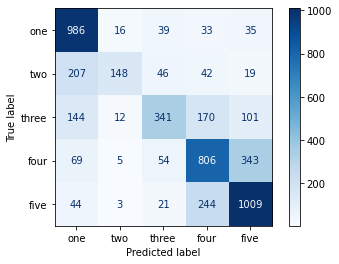



Model: MultinomialNB

MultinomialNB(alpha=0.5)


Accuracy Score:  0.5661332793194247
F1 Score:  0.5791622683298899
[[850  60  68  79  52]
 [174 124  76  62  26]
 [128  54 260 178 148]
 [ 77  29 107 619 445]
 [ 43  15  56 265 942]]


Classification Report: 
               precision    recall  f1-score   support

         1.0       0.67      0.77      0.71      1109
         2.0       0.44      0.27      0.33       462
         3.0       0.46      0.34      0.39       768
         4.0       0.51      0.48      0.50      1277
         5.0       0.58      0.71      0.64      1321

    accuracy                           0.57      4937
   macro avg       0.53      0.51      0.52      4937
weighted avg       0.55      0.57      0.55      4937





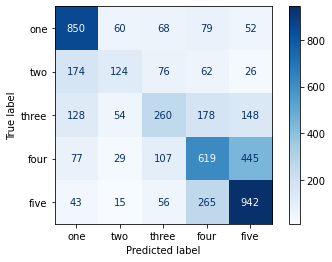



Model: DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy')


Accuracy Score:  0.6021875632975491
F1 Score:  0.605754500397717
[[835  75 100  55  44]
 [150 184  58  36  34]
 [114  44 349 162  99]
 [ 89  29 116 771 272]
 [ 42  25  74 346 834]]


Classification Report: 
               precision    recall  f1-score   support

         1.0       0.68      0.75      0.71      1109
         2.0       0.52      0.40      0.45       462
         3.0       0.50      0.45      0.48       768
         4.0       0.56      0.60      0.58      1277
         5.0       0.65      0.63      0.64      1321

    accuracy                           0.60      4937
   macro avg       0.58      0.57      0.57      4937
weighted avg       0.60      0.60      0.60      4937





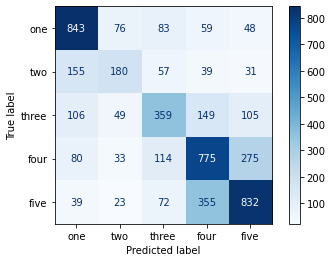

In [43]:
Models=[]
Accuracy=[]
F1=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    #Accuracy score
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy.append(acc*100)
    
    #F1 score
    f1=f1_score(pred,y_test,average='weighted')
    print('F1 Score: ',f1)
    F1.append(f1*100)
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plot_confusion_matrix(j.fit(x_train,y_train),x_test,y_test,display_labels=['one','two','three','four','five'],cmap=plt.cm.Blues)
    plt.show()
    print("\n")

In [44]:
#Dataframe to display all the results from different models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy,"F1 Score":F1})

Model  Accuracy Score   F1 Score
0  RandomForestClassifier       66.700425  68.097352
1           MultinomialNB       56.613328  57.916227
2  DecisionTreeClassifier       60.218756  60.575450

In [45]:
#Random Forest being the ensemble classifier over comes overfitting and also it is the best performing model
#saving Random forest
import joblib
joblib.dump(rf,'ratings_prediction.pkl')

['ratings_prediction.pkl']